In [115]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
from sklearn import metrics

In [79]:
df_temp = pd.read_csv('기상청_노면_습도_온도/서울_시간별기상정보_20100701_20160702.csv', encoding='cp949')

In [80]:
df_temp

,지점명,날짜,시간,습도,지면온도,지면상태
0,서울,2010-07-01,01:00,79.0,22.4,NaN
1,서울,2010-07-01,02:00,79.0,22.5,NaN
2,서울,2010-07-01,03:00,82.0,22.2,1.0
3,서울,2010-07-01,04:00,83.0,22.0,NaN
4,서울,2010-07-01,05:00,83.0,22.0,NaN
...,...,...,...,...,...,...
50456,서울,2016-07-02,19:00,64.0,24.4,NaN
50457,서울,2016-07-02,20:00,74.0,22.7,NaN
50458,서울,2016-07-02,21:00,80.0,21.7,NaN
50459,서울,2016-07-02,22:00,84.0,21.1,NaN


In [81]:
df_temp1=df_temp.dropna()

In [82]:
df_temp1

,지점명,날짜,시간,습도,지면온도,지면상태
2,서울,2010-07-01,03:00,82.0,22.2,1.0
8,서울,2010-07-01,09:00,71.0,27.2,1.0
14,서울,2010-07-01,15:00,50.0,36.5,1.0
20,서울,2010-07-01,21:00,80.0,25.7,1.0
25,서울,2010-07-02,03:00,83.0,25.0,1.0
...,...,...,...,...,...,...
50389,서울,2016-06-29,21:00,73.0,24.0,0.0
50394,서울,2016-06-30,03:00,79.0,23.4,0.0
50400,서울,2016-06-30,09:00,83.0,25.7,1.0
50406,서울,2016-06-30,15:00,71.0,30.7,1.0


In [83]:
df_temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 2 to 50412
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점명     8758 non-null   object 
 1   날짜      8758 non-null   object 
 2   시간      8758 non-null   object 
 3   습도      8758 non-null   float64
 4   지면온도    8758 non-null   float64
 5   지면상태    8758 non-null   float64
dtypes: float64(3), object(3)
memory usage: 479.0+ KB


In [84]:
df_temp1['날짜'] = pd.to_datetime(df_temp1['날짜'], format='%Y-%m-%d')

<ipython-input-84-94dacd4647cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp1['날짜'] = pd.to_datetime(df_temp1['날짜'], format='%Y-%m-%d')


In [85]:
df_temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 2 to 50412
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지점명     8758 non-null   object        
 1   날짜      8758 non-null   datetime64[ns]
 2   시간      8758 non-null   object        
 3   습도      8758 non-null   float64       
 4   지면온도    8758 non-null   float64       
 5   지면상태    8758 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 479.0+ KB


In [86]:
df_temp1

,지점명,날짜,시간,습도,지면온도,지면상태
2,서울,2010-07-01,03:00,82.0,22.2,1.0
8,서울,2010-07-01,09:00,71.0,27.2,1.0
14,서울,2010-07-01,15:00,50.0,36.5,1.0
20,서울,2010-07-01,21:00,80.0,25.7,1.0
25,서울,2010-07-02,03:00,83.0,25.0,1.0
...,...,...,...,...,...,...
50389,서울,2016-06-29,21:00,73.0,24.0,0.0
50394,서울,2016-06-30,03:00,79.0,23.4,0.0
50400,서울,2016-06-30,09:00,83.0,25.7,1.0
50406,서울,2016-06-30,15:00,71.0,30.7,1.0


In [87]:
#겨울철 자연재난 대책기간(11월 15일 ~ 3월 15일)기준 데이터 가져오기
filtered_df = df_temp1.query("날짜 >= '2010-11-15' and 날짜 <= '2016-03-15'")

In [88]:
filtered_df

,지점명,날짜,시간,습도,지면온도,지면상태
3153,서울,2010-11-15,03:00,42.0,-0.6,1.0
3159,서울,2010-11-15,09:00,46.0,0.2,1.0
3165,서울,2010-11-15,15:00,28.0,13.9,1.0
3171,서울,2010-11-15,21:00,31.0,-1.0,0.0
3176,서울,2010-11-16,03:00,45.0,-2.7,0.0
...,...,...,...,...,...,...
47928,서울,2016-03-14,21:00,40.0,3.1,0.0
47933,서울,2016-03-15,03:00,50.0,0.2,0.0
47939,서울,2016-03-15,09:00,30.0,1.4,0.0
47945,서울,2016-03-15,15:00,20.0,21.0,0.0


In [89]:
def nomyun(x):
    if x == 4 or x == 5 or x == 14 or x == 15:
        return 1
    else:
        return 0

In [90]:
filtered_df['노면빙결유무'] = filtered_df['지면상태'].apply(nomyun)

<ipython-input-90-01b1066c2088>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['노면빙결유무'] = filtered_df['지면상태'].apply(nomyun)


In [91]:
filtered_df[filtered_df['노면빙결유무']==1].count()

지점명       738
날짜        738
시간        738
습도        738
지면온도      738
지면상태      738
노면빙결유무    738
dtype: int64

In [92]:
filtered_df

,지점명,날짜,시간,습도,지면온도,지면상태,노면빙결유무
3153,서울,2010-11-15,03:00,42.0,-0.6,1.0,0
3159,서울,2010-11-15,09:00,46.0,0.2,1.0,0
3165,서울,2010-11-15,15:00,28.0,13.9,1.0,0
3171,서울,2010-11-15,21:00,31.0,-1.0,0.0,0
3176,서울,2010-11-16,03:00,45.0,-2.7,0.0,0
...,...,...,...,...,...,...,...
47928,서울,2016-03-14,21:00,40.0,3.1,0.0,0
47933,서울,2016-03-15,03:00,50.0,0.2,0.0,0
47939,서울,2016-03-15,09:00,30.0,1.4,0.0,0
47945,서울,2016-03-15,15:00,20.0,21.0,0.0,0


In [94]:
regression_result = filtered_df

In [95]:
filtered_df['시간'] = pd.to_datetime(filtered_df['시간'], format='%H:%M')

<ipython-input-95-5dadba1bedf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['시간'] = pd.to_datetime(filtered_df['시간'], format='%H:%M')


In [96]:
filtered_df

,지점명,날짜,시간,습도,지면온도,지면상태,노면빙결유무
3153,서울,2010-11-15,1900-01-01 03:00:00,42.0,-0.6,1.0,0
3159,서울,2010-11-15,1900-01-01 09:00:00,46.0,0.2,1.0,0
3165,서울,2010-11-15,1900-01-01 15:00:00,28.0,13.9,1.0,0
3171,서울,2010-11-15,1900-01-01 21:00:00,31.0,-1.0,0.0,0
3176,서울,2010-11-16,1900-01-01 03:00:00,45.0,-2.7,0.0,0
...,...,...,...,...,...,...,...
47928,서울,2016-03-14,1900-01-01 21:00:00,40.0,3.1,0.0,0
47933,서울,2016-03-15,1900-01-01 03:00:00,50.0,0.2,0.0,0
47939,서울,2016-03-15,1900-01-01 09:00:00,30.0,1.4,0.0,0
47945,서울,2016-03-15,1900-01-01 15:00:00,20.0,21.0,0.0,0


In [98]:
df2 = filtered_df.query("시간 == '1900-01-01 09:00:00'")
df2

,지점명,날짜,시간,습도,지면온도,지면상태,노면빙결유무
3159,서울,2010-11-15,1900-01-01 09:00:00,46.0,0.2,1.0,0
3182,서울,2010-11-16,1900-01-01 09:00:00,46.0,0.2,0.0,0
3205,서울,2010-11-17,1900-01-01 09:00:00,71.0,4.5,0.0,0
3228,서울,2010-11-18,1900-01-01 09:00:00,63.0,2.1,0.0,0
3251,서울,2010-11-19,1900-01-01 09:00:00,68.0,3.6,0.0,0
...,...,...,...,...,...,...,...
47847,서울,2016-03-11,1900-01-01 09:00:00,47.0,0.1,0.0,0
47870,서울,2016-03-12,1900-01-01 09:00:00,57.0,0.1,0.0,0
47893,서울,2016-03-13,1900-01-01 09:00:00,81.0,3.6,1.0,0
47916,서울,2016-03-14,1900-01-01 09:00:00,77.0,3.8,1.0,0


In [99]:
regression_result = df2

In [119]:
import statsmodels.api as sm
# logistic regression
feature = df2[['지면온도', '습도']]
output = df2['노면빙결유무']
model = sm.formula.glm("output ~ feature", df2, family = sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 output   No. Observations:                 1944
Model:                            GLM   Df Residuals:                     1941
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -433.66
Date:                Sat, 18 Sep 2021   Deviance:                       867.33
Time:                        19:02:37   Pearson chi2:                     754.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1409      0.326     -0.432      0.6

In [120]:
np.exp(model.params)

Intercept     0.868545
feature[0]    0.778325
feature[1]    0.983302
dtype: float64

In [100]:

x = regression_result[['지면온도', '습도']]
y = regression_result['노면빙결유무']

train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1360, 2) (584, 2) (1360,) (584,)


In [101]:
# 로지스틱 모형 적합

model = sm.Logit(train_y, train_x)
results = model.fit(method = "newton")    # 다변수함수에 뉴턴방법을 적용한 로지스틱 회귀모형

Optimization terminated successfully.
         Current function value: 0.225476
         Iterations 9


In [102]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 노면빙결유무   No. Observations:                 1360
Model:                          Logit   Df Residuals:                     1358
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.4038
Time:                        18:49:20   Log-Likelihood:                -306.65
converged:                       True   LL-Null:                       -514.35
Covariance Type:            nonrobust   LLR p-value:                 2.440e-92
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
지면온도          -0.2423      0.022    -10.917      0.000      -0.286      -0.199
습도            -0.0201      0.002    -11.190      0.000      -0.024      -0.017
==============================================================================
"""

In [103]:
np.exp(results.params)

지면온도    0.784800
습도      0.980101
dtype: float64

In [104]:
pred_y = results.predict(test_x)
pred_y

13509    0.844953
6586     0.012541
33196    0.000984
6310     0.020296
20362    0.259360
           ...   
32966    0.001440
4378     0.643554
43684    0.001483
28343    0.087712
6954     0.016007
Length: 584, dtype: float64

In [105]:
# 임계값 함수

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.5)
pred_Y

13509    1
6586     0
33196    0
6310     0
20362    0
        ..
32966    0
4378     1
43684    0
28343    0
6954     0
Length: 584, dtype: int32

In [108]:
# confusion matrix (분류 표를 나타낸 행렬)

cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[492  18]
 [ 59  15]]


In [112]:
# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.8681506849315068

In [113]:
# 임계값 0~1에 따른 정확도 확인

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y,pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.126712
0.1,0.804795
0.2,0.859589
0.3,0.876712
0.4,0.871575
0.5,0.868151
0.6,0.869863
0.7,0.881849
0.8,0.876712


AUC: 0.9257419183889772


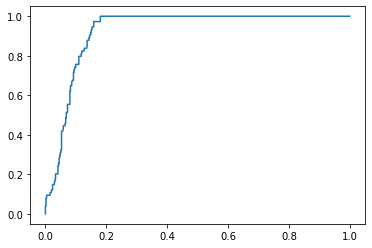

In [116]:
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = metrics.roc_curve(test_y,pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)